<img src="https://www.fisheries.noaa.gov/s3//styles/full_width/s3/dam-migration/3753x2502-block-island-wind-farm.png?itok=JvJksTwd" width=281 alt="Wind Turbines"></img> <img src="https://psl.noaa.gov/data/obs/instruments/Radar915PhasedArrayAntenna.jpg" width=260 alt="RWP"></img> <img src="https://psl.noaa.gov/data/obs/sites/images/bid/bid1.jpg" width=250.5 alt="RWP Site"></img>

# Comparing Model Wind Data to Observed Wind Data

---

## Overview
Numerical weather models play an important role in how weather forecasts are made.  They are a useful tool for meteorologists that can help them to refine their forecasts.  In this notebook, we will be able to examine the use of numerical weather prediction (NWP) using a real-world project as an example.  Users of this notebook will be introduced to the third Wind Forecasting Improvement Project (WFIP3) and its use of the High-Resolution Rapid Refresh (HRRR) NWP model to help in forecasting wind energy for offshore wind farms in the northeast.  Users will also gain experience using Herbie to download model data as well as working with observed radar wind profiler and sodar data (from NOAA's Physical Sciences Laboratory and Argonne National Laboratory).  

Topics in this notebook include:
1. Brief Discussion of the WFIP3 Project
1. Downloading and Plotting Model Data with Herbie
1. Downloading and Plotting Observed Wind Data
1. Comparing Model and Observed Data

## Prerequisites

This notebook will involve use of Herbie and the Atmospheric Community Toolkit (ACT) to download/read in data.  It also relies on MetPy to handle a couple calculations and MatPlotLib for plotting purposes.

| Concepts | Importance | Notes |
| --- | --- | --- |
| ACT | Necessary | |
| Herbie | Necessary | |
| MetPy | Helpful | |
| NumPy | Helpful | |
| MatPlotLib | Necessary | | 
| Xarray | Helpful | |
| CartoPy | Helpful | |

- **Time to learn**: 60 Minutes
- **System requirements** (Preferably the latest version of each):
    - Python
    - ACT
    - MetPy
    - Herbie
    - NumPy
    - MatPlotLib
    - Xarray
    - Datetime
    - CartoPy
    - IPython
    - Imageio V2

---

## Imports

In [1]:
import act
import xarray as xr
from herbie import Herbie
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime, timedelta
import imageio.v2 as imageio
from IPython.display import display, Image as IPImage
import warnings
warnings.simplefilter('ignore')

## Brief Discussion of the WFIP3 Project

The third edition of the Wind Forecasting Improvement Project (WFIP3) deals with exploring our offshore wind resource and seeing what oceanic and atmospheric processes affect the availability of it.  Funded by the Department of Energy (DOE), this project aims to deploy several sensors to measure low-level winds (i.e., those closer to the hub height of a wind turbine) and boundary layer characteristics.  From this, the goal is to better understand the oceanic and atmospheric processes taking place, as well as have a comparison to numerical model data.  This will help us to see what might cause inaccuracies in model wind forecasting, and allow us to improve upon such models for better wind energy and power output forecasts.  More information can be found on the [DOE's Atmosphere to Electrons page](https://a2e.energy.gov/project/wfip3). 

---

## Downloading and Plotting Model Data with Herbie

We will begin by first looking at model data using a module called Herbie.  Herbie allows us to retrieve archived data from several models, but we will be focusing on the HRRR model.  For now let's just focus on the 24-hour forecast.  You will be asked to input a year, month, and day.

In [2]:
#For best results, try  dates within the range 04/17/2024-05/15/2024 
yr=input('Year (yyyy):')
m=input('Month (mm):')
dd=input('Day (dd):')
fmt = '%Y.%m.%d'
date = f'{yr}.{m}.{dd}'
dt = datetime.strptime(date, fmt)
tt = dt.timetuple()
day_of_year = tt.tm_yday
fh=[]
step=[]
H=[]
ds=[]
for a in range(0, 25):
    step.append(a*3600000000000)
    #Create a list of the forecast hours in "HH" format, this allows
    #for saving all images in order later for creating the gif
    if a <10:
        fh.append(f'0{a}')
    else:
        fh.append(f'{a}')
    H.append(Herbie(f"{yr}-{m}-{dd}",  # model run date
        model="hrrr",  # model name
        product="prs", #product
        fxx=a,  # forecast lead time
              ))
    #Keep level set to 1000 mb since that's the closest level to the observed data
    ds.append(H[a].xarray(f":1000 mb:", remove_grib=False))
    ds[a]['wspd'] = (('y', 'x'), (mpcalc.wind_speed(ds[a].u.values*units.meter/units.second, 
                                                    ds[a].v.values*units.meter/units.second)).m)
    ds[a].wspd.attrs['long_name'] = 'Wind Speed'
    ds[a]['wdir'] = (('y', 'x'), (mpcalc.wind_direction(ds[a].u.values*units.meter/units.second, 
                                                        ds[a].v.values*units.meter/units.second)).m)
    ds[a].wdir.attrs['long_name'] = 'Wind Direction'

Year (yyyy): 2024
Month (mm): 04
Day (dd): 25


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrr

In [3]:
#Here we combine the list of datasets to make them easier to work with
ds = xr.concat(ds, dim=step)
ds

<xarray.Dataset> Size: 3GB
Dimensions:              (concat_dim: 25, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2024-04-25
    step                 (concat_dim) timedelta64[ns] 200B 00:00:00 ... 1 day...
    isobaricInhPa        float64 8B 1e+03
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           (concat_dim) datetime64[ns] 200B 2024-04-25 ... 2024...
    gribfile_projection  object 8B None
  * concat_dim           (concat_dim) int64 200B 0 ... 86400000000000
Dimensions without coordinates: y, x
Data variables: (12/16)
    unknown              (concat_dim, y, x) float32 191MB 0.0 0.0 ... 1e-12
    t                    (concat_dim, y, x) float32 191MB 290.6 290.6 ... 271.9
    u                    (concat_dim, y, x) float32 191MB -4.765 ... 14.69
    v                    (concat_dim, y, x) float32 191MB -4.445 ... 2.198
    q                    (concat_dim, y, x) float32 191MB 0.01051 ... 0.00275
    w                    (concat_dim, y, x) float32 191MB -0.005109 ... -0.0873
    ...                   ...
    clwmr                (concat_dim, y, x) float32 191MB 0.0 0.0 ... 0.0 0.0
    rwmr                 (concat_dim, y, x) float32 191MB 0.0 0.0 ... 0.0 0.0
    snmr                 (concat_dim, y, x) float32 191MB 0.0 0.0 ... 0.0 0.0
    grle                 (concat_dim, y, x) float32 191MB 0.0 0.0 ... 0.0 0.0
    wspd                 (concat_dim, y, x) float32 191MB 6.517 6.517 ... 14.85
    wdir                 (concat_dim, y, x) float32 191MB 46.99 46.99 ... 261.5
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             C:\Users\nickm\data\hrrr\20240425\hrrr.t00z.wrfp...
    local_grib:              C:\Users\nickm\data\hrrr\20240425\subset_38ef26f...
    search:                  :1000 mb:

### Subsetting for the Three Sites
Here we will subset the data to only the three observation sites:

In [4]:
#We want to find the data at a certain lat/lon point
#Coordinates:
#Rhode Island: 41.4456, -71.4357
#Cape Cod: 42.03, -70.049
#Sodar: 41.2453, -70.105
#Block Island: 41.17, -71.58
lat1, lon1 = 41.4456, -71.4357
lat2, lon2 = 42.03, -70.049
lat3, lon3 = 41.2453, -70.105
lat4, lon4 = 41.17, -71.58
lat = [lat1, lat2, lat3, lat4]
lon = [lon1, lon2, lon3, lon4]
point_ds=[]
ds['longitude'] = (ds['longitude'] + 180) % 360 - 180
for b in range(0, 4):
    # First, find the index of the grid point nearest a specific lat/lon
    abslat = np.abs(ds.latitude-lat[b])
    abslon = np.abs(ds.longitude-lon[b])
    c = np.maximum(abslon, abslat)
    ([yloc], [xloc]) = np.where(c == np.min(c))
    # Now we can use that index location to get the values at the x/y diminsion
    point_ds.append(ds.sel(x=xloc, y=yloc))
rhod_model = point_ds[0]
caco_model = point_ds[1]
sodar_model = point_ds[2]
block_model = point_ds[3]

### Plotting the Data
Now it's time to plot the variables.  First we will look at wind speed:

In [5]:
#Create "Peak power" and 'Cut-out" to allow us to have a better visual of model error
peak_power=[]
for d in range(0, 25):
    peak_power.append(14)
cut_out=[]
for d in range(0, 25):
    cut_out.append(24.5)

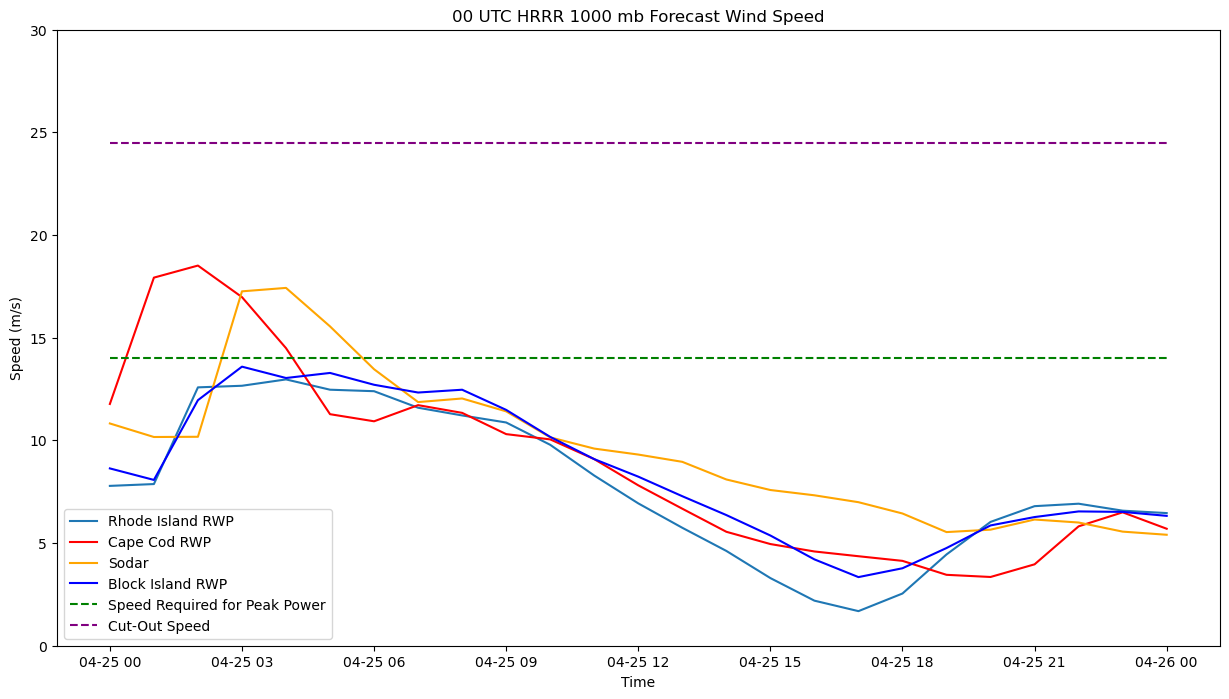

In [6]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
ax.plot(rhod_model.valid_time, rhod_model.wspd, label='Rhode Island RWP')
ax.plot(caco_model.valid_time, caco_model.wspd, color='red', label='Cape Cod RWP')
ax.plot(sodar_model.valid_time, sodar_model.wspd, color='orange', label='Sodar')
ax.plot(block_model.valid_time, block_model.wspd, color='blue', label='Block Island RWP')
ax.plot(rhod_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(rhod_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'00 UTC HRRR 1000 mb Forecast Wind Speed')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_HRRRspd.png', bbox_inches='tight', dpi=150)

And now wind direction:

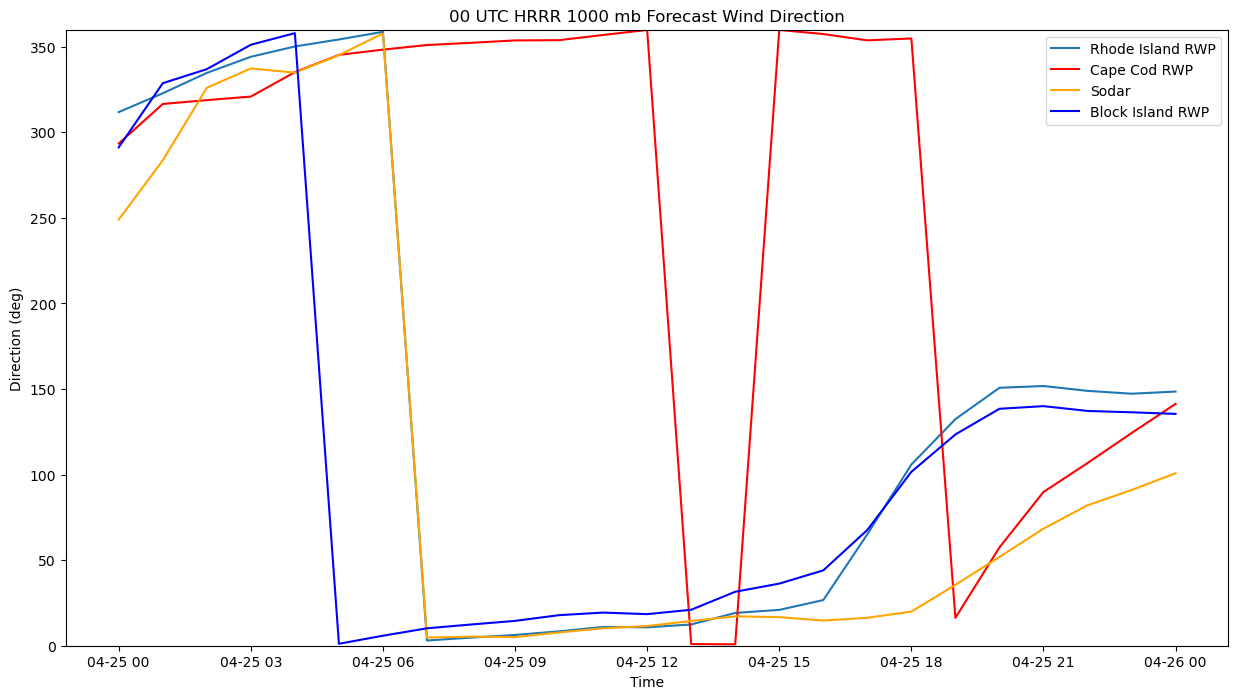

In [7]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
ax.plot(rhod_model.valid_time, rhod_model.wdir, label = 'Rhode Island RWP')
ax.plot(caco_model.valid_time, caco_model.wdir, color='red', label='Cape Cod RWP ')
ax.plot(sodar_model.valid_time, sodar_model.wdir, color='orange', label='Sodar')
ax.plot(block_model.valid_time, block_model.wdir, color='blue', label='Block Island RWP')
ax.set_title(f'00 UTC HRRR 1000 mb Forecast Wind Direction')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_HRRRdir.png', bbox_inches='tight', dpi=150)


## Downloading and Plotting Observed Wind Data
We have our model data downloaded and plotted, now it's time to do the same with our observed data from the wind profilers and sodar.  **NOTE:** If an error occurs here, it is likely due to the datafile for your date of choice not being available for one or more instruments.  You might have to go back a few times and try different dates.  Yes, it can get frustrating.

In [8]:
#Read in the Rhode Island Data
ds1, ds2 = act.io.read_psl_wind_profiler(f"../data/rhod-rwp-raw/rhod.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
#Read in the Cape Cod data
ds3, ds4 = act.io.read_psl_wind_profiler(f"../data/caco-rwp-raw/caco.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
# Call the read_sodar function
# More information on the sodar can be found here:
# https://www.scintec.com/products/flat-array-sodar-mfas/
ds5 = act.io.read_mfas_sodar(f'../data/nant-sodar-raw/nant.sodar.z01.00.{yr}{m}{dd}.000000.mnd')

Reading in the Block Island data is a bit more complicated.  The NOAA PSL website has each hour of the day as its own dataset, so we must read each one in individually and then combine them into one big dataset.  Unfortunately, in this case the introduction of a third dimension (the concatenated time dimension) makes the data much harder to work with, so we will use the values from the combined dataset to create a new dataset with only time and height as dimensions. 

In [9]:
#Read in the Block Island Data
bid_files=[]
bid_correct_files=[]
bid_time=[]
for f in range(0, 10):
    bid_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/{yr}/{day_of_year}/bid{int(yr)-2000}{day_of_year}.0{f}w", 
                                         transpose=False))
    bid_correct_files.append(bid_files[f][0])
    bid_time.append(bid_correct_files[f].time.values[0])
for f in range(10, 24):
    bid_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/{yr}/{day_of_year}/bid{int(yr)-2000}{day_of_year}.{f}w", 
                                         transpose=False))
    bid_correct_files.append(bid_files[f][0])
    bid_time.append(bid_correct_files[f].time.values[0])

bid_data = xr.concat(bid_correct_files, dim=bid_time)

bid_SPD=[]
bid_DIR=[]
for g in range(0, 24):
    bid_SPD.append(bid_data.SPD[g].values[g])
    bid_DIR.append(bid_data.DIR[g].values[g])
    
ds6 = xr.Dataset(
    data_vars=dict(
        SPD = (["time", "HT"], bid_SPD),
        DIR = (["time", "HT"], bid_DIR),
        U = (["time", "HT"], -(bid_SPD*np.sin(np.deg2rad(bid_DIR)))),
        V = (["time", "HT"], -(bid_SPD*np.cos(np.deg2rad(bid_DIR))))
    ),
    coords=dict(
        time = bid_time,
        HT = bid_data.HT.values
    ))

### Interpolating and Subsetting
The wind profiler data has a much lower resolution than the SODAR data, and is much more heavily dependent on large scatterers.  Because of this dependency, much of the data for specific height levels will return as "nan" and will not plot.  We first need to interpolate with respect to time and height so that both the profiler and SODAR data have the same time and height intervals.  Then, we will subset each dataset so that they all pull data from the same height.  Finally, we will interpolate using the actual data values for wind speed and direction to eliminate all "nan" values and get the data to plot.

In [10]:
#Create the time ranges for time interpolation using our input date
def create_time_ranges(start, end, interval_minutes):
    current_time = start
    while current_time < end:
        yield current_time
        current_time += timedelta(minutes=interval_minutes)
start_time = datetime(int(yr), int(m), int(dd), 0, 0)  #start time
end_time = start_time+timedelta(1.001)  #end time
interval_minutes = 60  #interval in minutes
sodar_int_minutes = 10
time_intervals = list(create_time_ranges(start_time, end_time, interval_minutes))
sodar_intervals = list(create_time_ranges(start_time, end_time, sodar_int_minutes))
#Interpolate in for height and time
ds1_interp_height = ds1.interp(HT=np.arange(0, 6, .01), kwargs={"fill_value": "extrapolate"}, method='nearest')
ds3_interp_height = ds3.interp(HT=np.arange(0, 6, .01), kwargs={"fill_value": "extrapolate"}, method='nearest')
ds6_interp_height = ds6.interp(HT=np.arange(0, 6, .01), kwargs={"fill_value": "extrapolate"}, method='nearest')
ds1_interp_time = ds1_interp_height.interp(time=time_intervals, kwargs={"fill_value": "extrapolate"}, method='nearest')
ds3_interp_time = ds3_interp_height.interp(time=time_intervals, kwargs={"fill_value": "extrapolate"}, method='nearest')
ds5_interp_time = ds5.interp(time=sodar_intervals, kwargs={"fill_value": "extrapolate"}, method='nearest')
ds6_interp_time = ds6_interp_height.interp(time=time_intervals, kwargs={"fill_value": "extrapolate"}, method='nearest')

#Subset the data to a single height
ds1_height=ds1_interp_time.sel(HT=0.18)
ds3_height=ds3_interp_time.sel(HT=0.18)
ds5_height=ds5_interp_time.sel(height = 180)
ds6_height=ds6_interp_time.sel(HT=0.18)

#Create a definition function to eliminate NaNs
y = [ds1_height.SPD.values, ds3_height.SPD.values, ds5_height.speed.values, ds6_height.SPD.values,
     ds1_height.DIR.values, ds3_height.DIR.values, ds5_height.dir.values, ds6_height.DIR.values,
     ds1_height.U.values, ds3_height.U.values, ds5_height.U.values, ds6_height.U.values,
     ds1_height.V.values, ds3_height.V.values, ds5_height.V.values, ds6_height.V.values]
def nan_helper(y):
    nans = np.isnan(y)
    index = lambda z: z.nonzero()[0]
    return nans, index
#Interpolate NaNs
for h in range(0, 16):
    nans, x = nan_helper(y[h])
    y[h][nans] = np.interp(x(nans), x(~nans), y[h][~nans])

### Plotting
We can now plot the data.  Again, we will plot wind speed first:

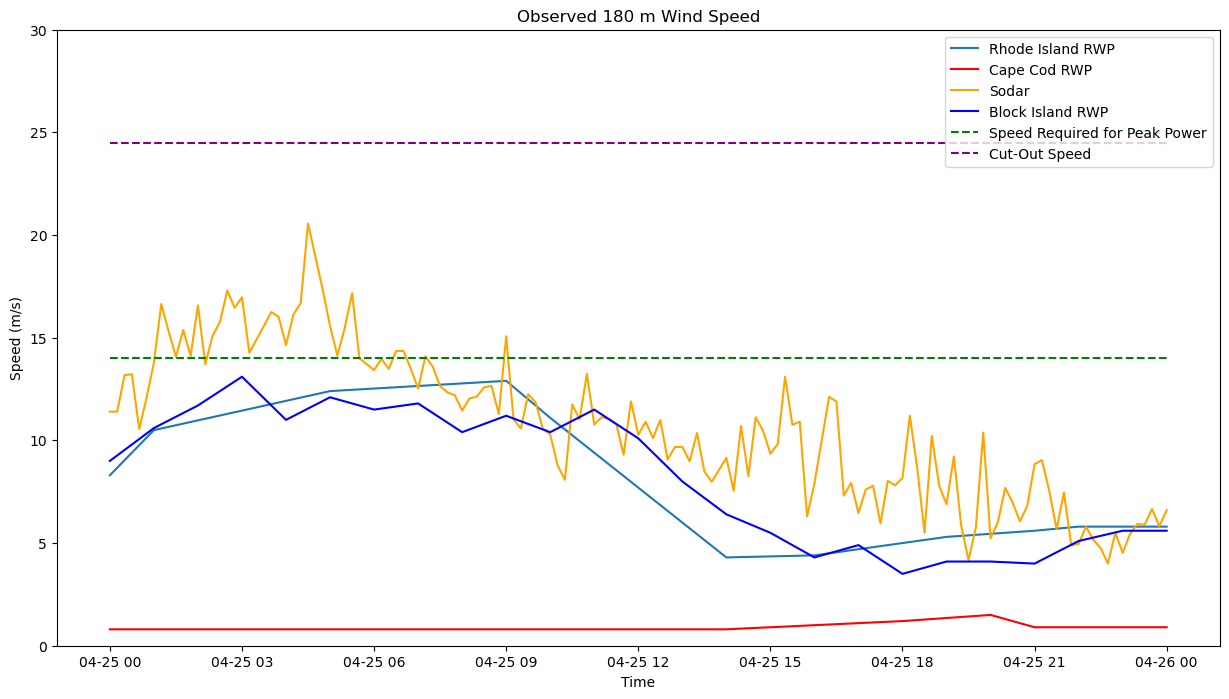

In [11]:
plt.figure(1, figsize=(15, 8))
ax=plt.subplot(111)
ax.plot(ds1_height.time, ds1_height.SPD, label='Rhode Island RWP')
ax.plot(ds3_height.time, ds3_height.SPD, color='red', label='Cape Cod RWP')
ax. plot(ds5_height.time, ds5_height.speed, color='orange', label='Sodar')
ax.plot(ds6_height.time, ds6_height.SPD, color='blue', label='Block Island RWP')
ax.plot(rhod_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(rhod_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'Observed 180 m Wind Speed')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsspd.png', bbox_inches='tight', dpi=150)

And once again, wind direction:

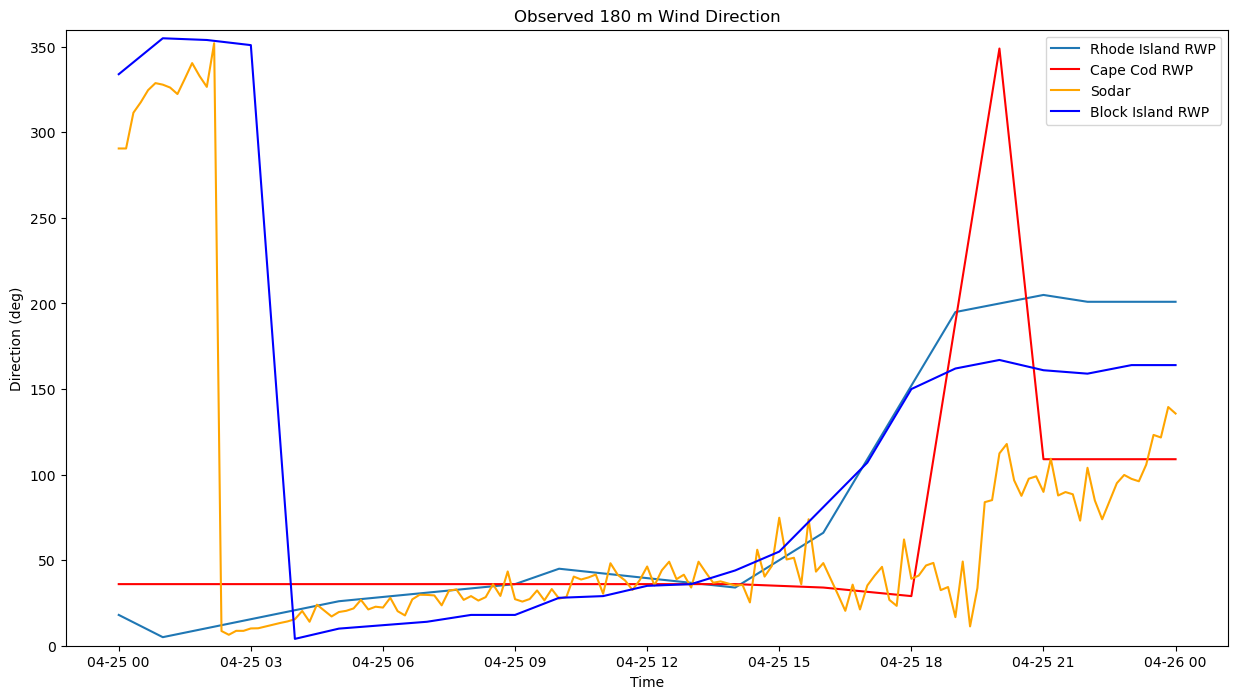

In [12]:
plt.figure(1, figsize=(15, 8))
ax = plt.subplot(111)
ax.plot(ds1_height.time, ds1_height.DIR, label='Rhode Island RWP')
ax.plot(ds3_height.time, ds3_height.DIR, color='red', label='Cape Cod RWP')
ax.plot(ds5_height.time, ds5_height.dir, color='orange', label='Sodar')
ax.plot(ds6_height.time, ds6_height.DIR, color='blue', label='Block Island RWP')
ax.set_title(f'Observed 180 m Wind Direction')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsdir.png', bbox_inches='tight', dpi=150)

## Comparing Model and Observed Data

Here is the good stuff.  This is where we put everything together, looking at both the model and observed wind data on the same graph.  We will focus on just the wind speed data.  Although a significant difference in wind direction may indicate some sort of error with the model, we won't focus on it too much since wind turbines can rotate to work from any direction.

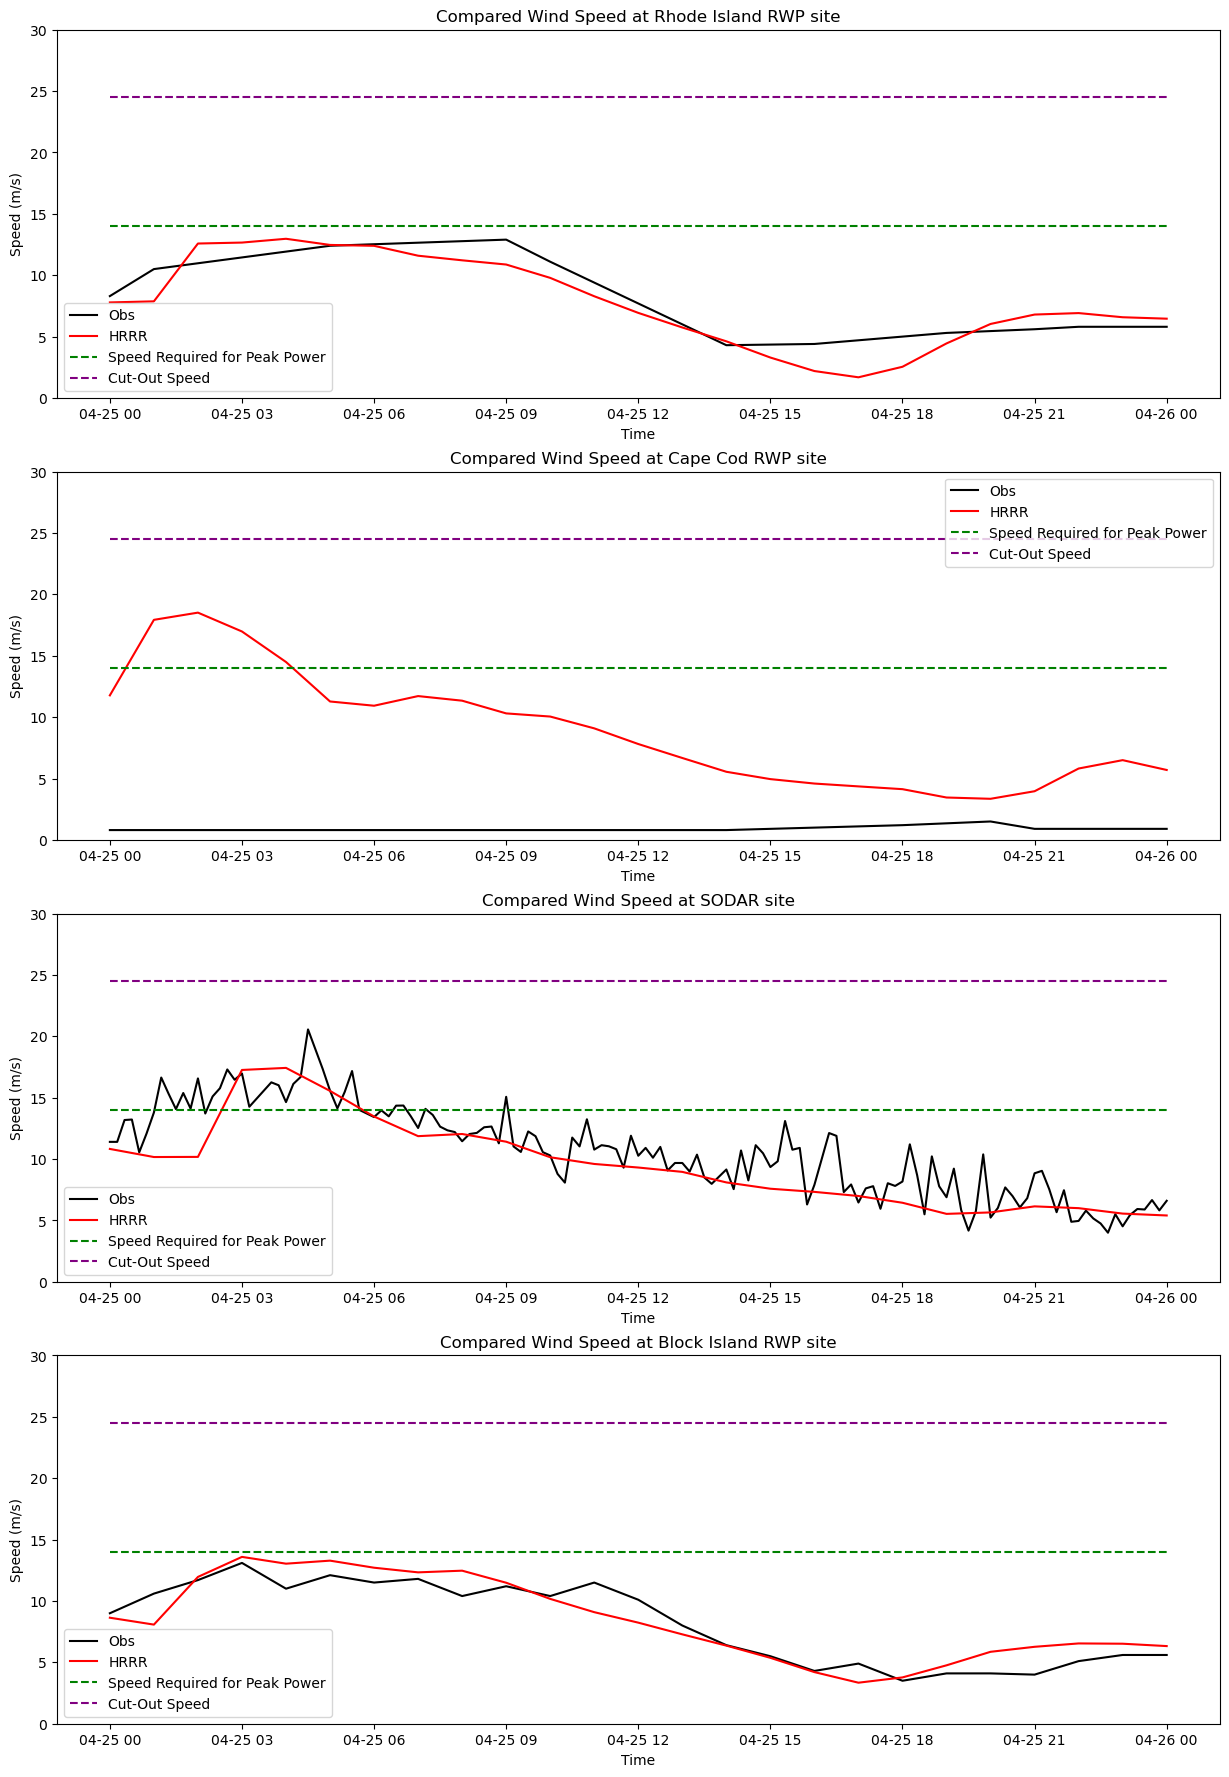

In [13]:
plt.figure(1, figsize=(15, 22))
ax=plt.subplot(411)
ax.plot(ds1_height.time, ds1_height.SPD, color='black', label='Obs')
ax.plot(rhod_model.valid_time, rhod_model.wspd, color='red', label='HRRR')
ax.plot(rhod_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(rhod_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'Compared Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(412)
ax.plot(ds3_height.time, ds3_height.SPD, color='black', label='Obs')
ax.plot(caco_model.valid_time, caco_model.wspd, color='red', label='HRRR')
ax.plot(caco_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(caco_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'Compared Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(413)
ax.plot(ds5_height.time, ds5_height.speed, color='black', label='Obs')
ax.plot(sodar_model.valid_time, sodar_model.wspd, color='red', label='HRRR')
ax.plot(sodar_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(sodar_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'Compared Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(414)
ax.plot(ds6_height.time, ds6_height.SPD, color='black', label='Obs')
ax.plot(block_model.valid_time, block_model.wspd, color='red', label='HRRR')
ax.plot(block_model.valid_time, peak_power, color='green', linestyle='dashed', 
        label='Speed Required for Peak Power')
ax.plot(block_model.valid_time, cut_out, color='purple', linestyle='dashed', label='Cut-Out Speed')
ax.set_title(f'Compared Wind Speed at Block Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 30)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Comparisonspd.png', bbox_inches='tight', dpi=150)

### Plotting Model Error

In [14]:
#Model data and observed sodar data have different temporal resolution, 
#so we will once again have to do a time interpolation 
sodar_spd=[]
for g in range(0, 24):
    for i in range(0,6):
        sodar_spd.append(sodar_model.wspd.values[g])
sodar_spd.append(sodar_model.wspd.values[24])
#Create a "zero line" to allow us to have a better visual of model error
zero_line=[]
#We need a different zero line for the sodar data since it has a different length
zero_line_sodar=[]
for a in range(0, 25):
    zero_line.append(0)
for j in range(0, 145):
    zero_line_sodar.append(0)

We will calculate the model bias and root mean square error to give us quantitative values of error to go along with the plots.

In [15]:
#Calculate Model Bias
rhod_bias = np.mean(rhod_model.wspd.values-ds1_height.SPD).values
caco_bias = np.mean(caco_model.wspd.values-ds3_height.SPD).values
sodar_bias = np.mean(sodar_spd-ds5_height.speed).values
block_bias = np.mean(block_model.wspd.values-ds6_height.SPD).values

#Calculate Root Mean Square Error
rhod_rmse = np.sqrt(np.mean((rhod_model.wspd.values-ds1_height.SPD)**2).values)
caco_rmse = np.sqrt(np.mean((caco_model.wspd.values-ds3_height.SPD)**2).values)
sodar_rmse = np.sqrt(np.mean((sodar_spd-ds5_height.speed)**2).values)
block_rmse = np.sqrt(np.mean((block_model.wspd.values-ds6_height.SPD)**2).values)

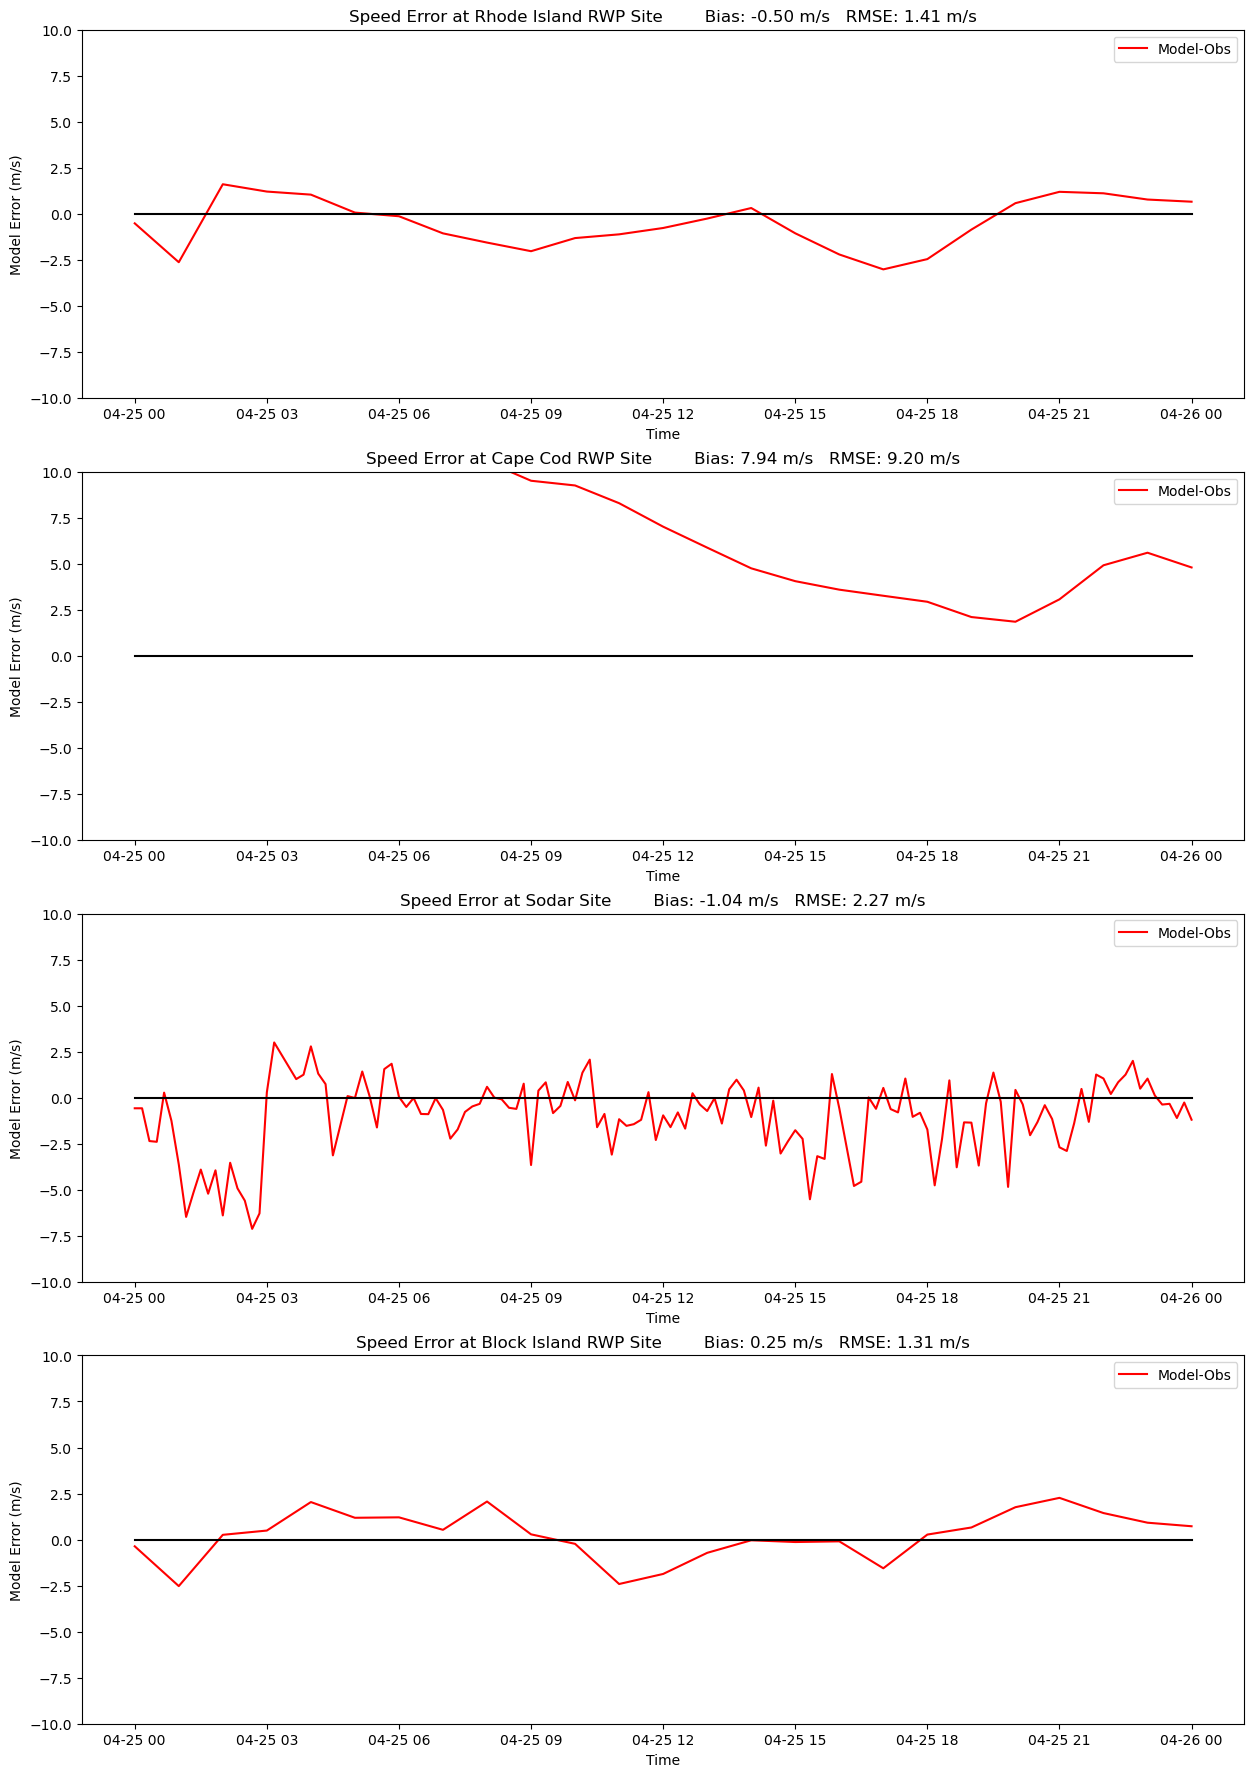

In [16]:
#And now we plot
plt.figure(1, figsize = (15, 22))
ax = plt.subplot(411)
ax.plot(ds1_height.time, rhod_model.wspd.values-ds1_height.SPD, color='red', label='Model-Obs')
ax.plot(ds1_height.time, zero_line, color='black')
ax.set_title(f'Speed Error at Rhode Island RWP Site'
             f'        Bias: {(rhod_bias):.2f} m/s   RMSE: {(rhod_rmse):.2f} m/s')
ax.set_ylabel('Model Error (m/s)')
ax.set_ylim(-10, 10)
ax.set_xlabel('Time')
ax.legend()
ax = plt.subplot(412)
ax.plot(ds3_height.time, caco_model.wspd.values-ds3_height.SPD, color='red', label='Model-Obs')
ax.plot(ds3_height.time, zero_line, color='black')
ax.set_title(f'Speed Error at Cape Cod RWP Site'
             f'        Bias: {(caco_bias):.2f} m/s   RMSE: {(caco_rmse):.2f} m/s')
ax.set_ylabel('Model Error (m/s)')
ax.set_ylim(-10, 10)
ax.set_xlabel('Time')
ax.legend()
ax = plt.subplot(413)
ax.plot(ds5_height.time, sodar_spd-ds5_height.speed, color='red', label='Model-Obs')
ax.plot(ds5_height.time, zero_line_sodar, color='black')
ax.set_title(f'Speed Error at Sodar Site'
             f'        Bias: {(sodar_bias):.2f} m/s   RMSE: {(sodar_rmse):.2f} m/s')
ax.set_ylabel('Model Error (m/s)')
ax.set_ylim(-10, 10)
ax.set_xlabel('Time')
ax.legend()
ax = plt.subplot(414)
ax.plot(ds6_height.time, block_model.wspd.values-ds6_height.SPD, color='red', label='Model-Obs')
ax.plot(ds6_height.time, zero_line, color='black')
ax.set_title(f'Speed Error at Block Island RWP Site'
             f'        Bias: {(block_bias):.2f} m/s   RMSE: {(block_rmse):.2f} m/s')
ax.set_ylabel('Model Error (m/s)')
ax.set_ylim(-10, 10)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_SPDerror.png', bbox_inches='tight', dpi=150)

### Wind Barb Comparison
Rather than plotting a time series graph, we will instead create a series of images where we plot the wind barbs to have a better visual idea of how well the model performed in terms of wind direction.  The code is set to save the individual images to create the output gif.

In [17]:
for a in range(0, 25):
    fig = plt.figure(1, figsize=(15, 15))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.set_extent([-72, -69.5, 40.75, 42.5]), ccrs.PlateCarree()
    cf = ax.contourf(ds.longitude, ds.latitude, ds.sel(concat_dim=step[a]).wspd, 
                     np.arange(0, 31, 2), cmap=plt.cm.BuPu)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax.barbs(lon1, lat1, rhod_model.u[a], rhod_model.v[a], color = 'red', length = 10)
    ax.barbs(lon2, lat2, caco_model.u[a], caco_model.v[a], color = 'red', length = 10)
    ax.barbs(lon3, lat3, sodar_model.u[a], sodar_model.v[a], color = 'red', length = 10)
    ax.barbs(lon4, lat4, block_model.u[a], block_model.v[a], color = 'red', length = 10)
    ax.barbs(lon1, lat1, ds1_height.U[a], ds1_height.V[a], color = 'blue', length = 10)
    ax.barbs(lon2, lat2, ds3_height.U[a], ds3_height.V[a], color = 'blue', length = 10)
    ax.barbs(lon3, lat3, ds5_height.U[a*6], ds5_height.V[a*6], color = 'blue', length = 10)
    ax.barbs(lon4, lat4, ds6_height.U[a], ds6_height.V[a], color = 'blue', length = 10)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.STATES.with_scale('50m'))
    ax.set_title(f'Time: {yr}-{m}-{dd}   00 UTC HRRR FH {a} 1000 mb Wind Speed (cfill)' 
                 f' and Wind Barbs (red) VS Obs Wind Barbs (blue) ')
    #plt.show()
    plt.savefig(f'../../../Downloads/{yr}{m}{dd}_FH_{fh[a]}_windbarbcomp.png', bbox_inches='tight', dpi=150)
    plt.close()

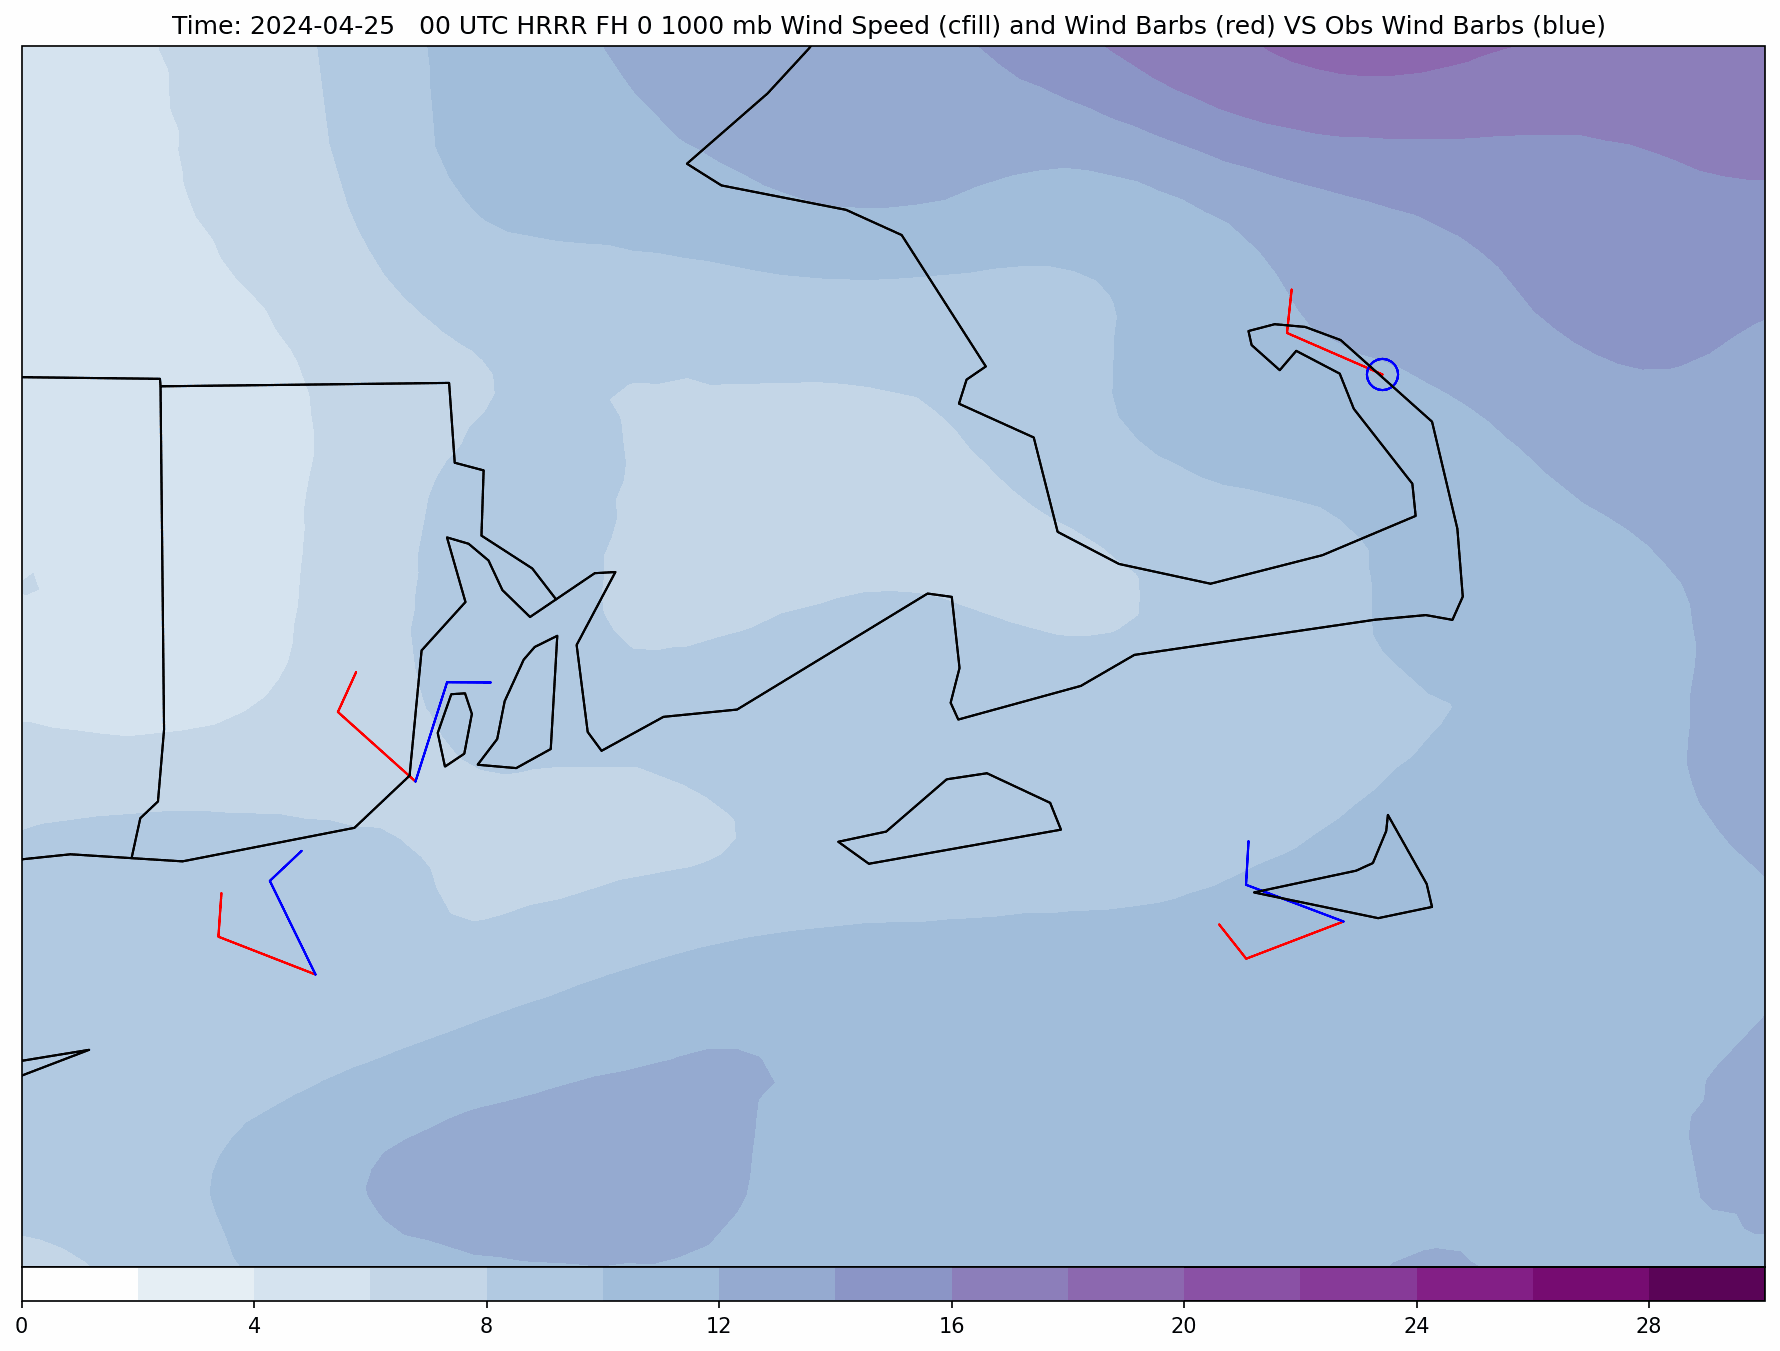

In [18]:
filenames = []
for a in range(0, 25):
    filenames.append(open(f"../../../Downloads/{yr}{m}{dd}_FH_{fh[a]}_windbarbcomp.png", 'rb'))
    
# Create Gif
images = [imageio.imread(filename) for filename in filenames]
imageio.mimsave(f"../../../Downloads/{yr}{m}{dd}_loop_windbarbcomp.gif", 
                images, duration=500, loop=1000)
#Show Gif
with open(f"../../../Downloads/{yr}{m}{dd}_loop_windbarbcomp.gif", 'rb') as f:
    display(IPImage(data=f.read(), format='gif'))

---

## Summary
Now that we have all of our plots, take a close look at them.  How did the HRRR perform on your day of choice?  Did it verify?  Was the forecast a complete bust?  Was there a part of the day where it did good and then another part where it wasn't so good?  How about between sites? Did one site perform better than another?  Was there a site that was an outlier?  Think about why this could be, and what atmospheric/oceanic processes (or lack thereof) might contribute to what you are seeing. You might also want to look at archived weather maps for this day to help you out in determining what processes were going on that day.  

### What's next?
Run the notebook again, but choose a different date this time.  Try to answer the above questions again.  Then, compare the two dates.  Which day saw a better performance from the HRRR?  Why might this be?  Try several different dates and compare them to each other.  See if you can find a day where the HRRR performed great with minimal error, one where there was a little more error, and one where there was a complete forecast bust (large error).  Try to find several days where the HRRR had minimal error (in other words, the forecast generally verified).  What are some similarities between them? How about the days with forecast busts?  Finally, think about what this means for wind energy in general.  Is the HRRR generally a good source of guidance for helping to predict power output?  What are the processes that the model would have to do a better job of picking up on to improve forecasts?

### Resources and references
**WFIP3 Project Info**

Krishnamurthy, R., Kirincich, A., & Turner, D. (2021). The Wind Forecasting Improvement Project 3 (WFIP-3). Atmosphere to Electrons. https://a2e.energy.gov/project/wfip3. Accessed 28 June 2024 

**Observed Data**

Cape Cod Data:

Atmosphere to Electrons (A2e). 2024. wfip3/caco.rwp.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2280917. Accessed: 28 06 2024.

Sodar Data:

Atmosphere to Electrons (A2e). 2024. wfip3/nant.sodar.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2234008. Accessed: 28 06 2024.

Rhode Island Data:

Atmosphere to Electrons (A2e). 2024. wfip3/rhod.rwp.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2229548. Accessed: 28 06 2024.

Block Island Data:

Physical Sciences Laboratory, NOAA. (2023, November 9). NOAA PSL Block Island Radar Wind Profiler Data. Boulder, CO: 325 Broadway. https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/ Accessed 28 06, 2024.

**Other Relevant Sources**

PSL Web Team, NOAA. (2024, February 15). Observation/model comparisons. Physical Sciences Laboratory. https://psl.noaa.gov/renewable_energy/wfip3/modelobs/. Accessed 28 June 2024 

